# Importing Libraries and Modules

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Standardizing
from sklearn.preprocessing import StandardScaler

#For Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#Metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [30]:
df=pd.read_csv(r'C:\Users\delkl\Desktop\DataTrained Data Science Projects\Projects\temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# EDA

In [3]:
df.shape

(7752, 25)

There are 7752 rows and 25 columns in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


There are number of null values. Date is an object type while the rest of the variables are float type. 

In [6]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [7]:
# Observation

#1. Lot of null values
#2. Lot of outliers in multiple variables

# Univariate Analysis

In [9]:
df_numerical=df[['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']]

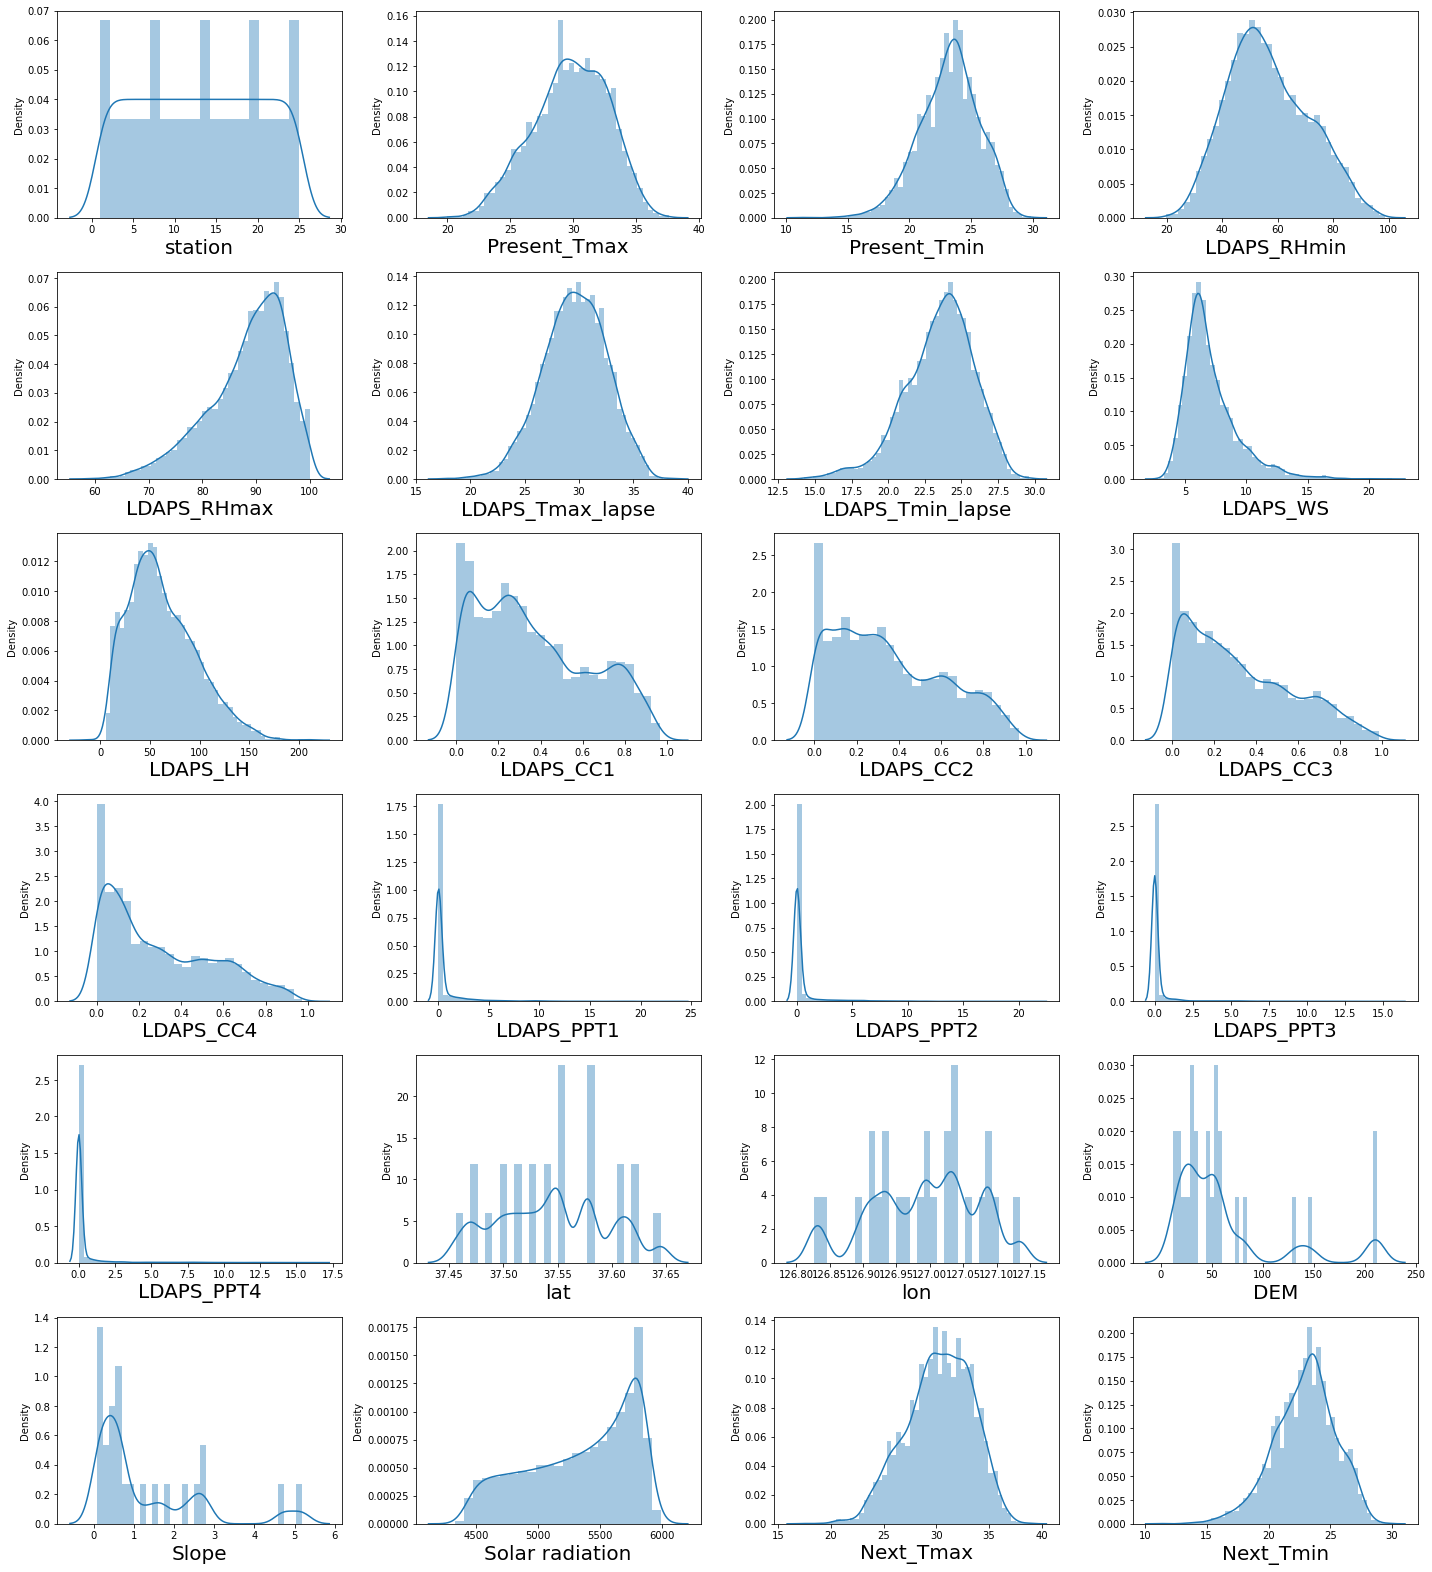

In [10]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df_numerical:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.distplot(df_numerical[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

Present_Tmin, LDAPS_RHmax, LDAPS_Tmin_Lapse, Solar radiation, Next_Tmin are left skewed. LDAPS_WS, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 are right skewed.

# Multivariate Analysis

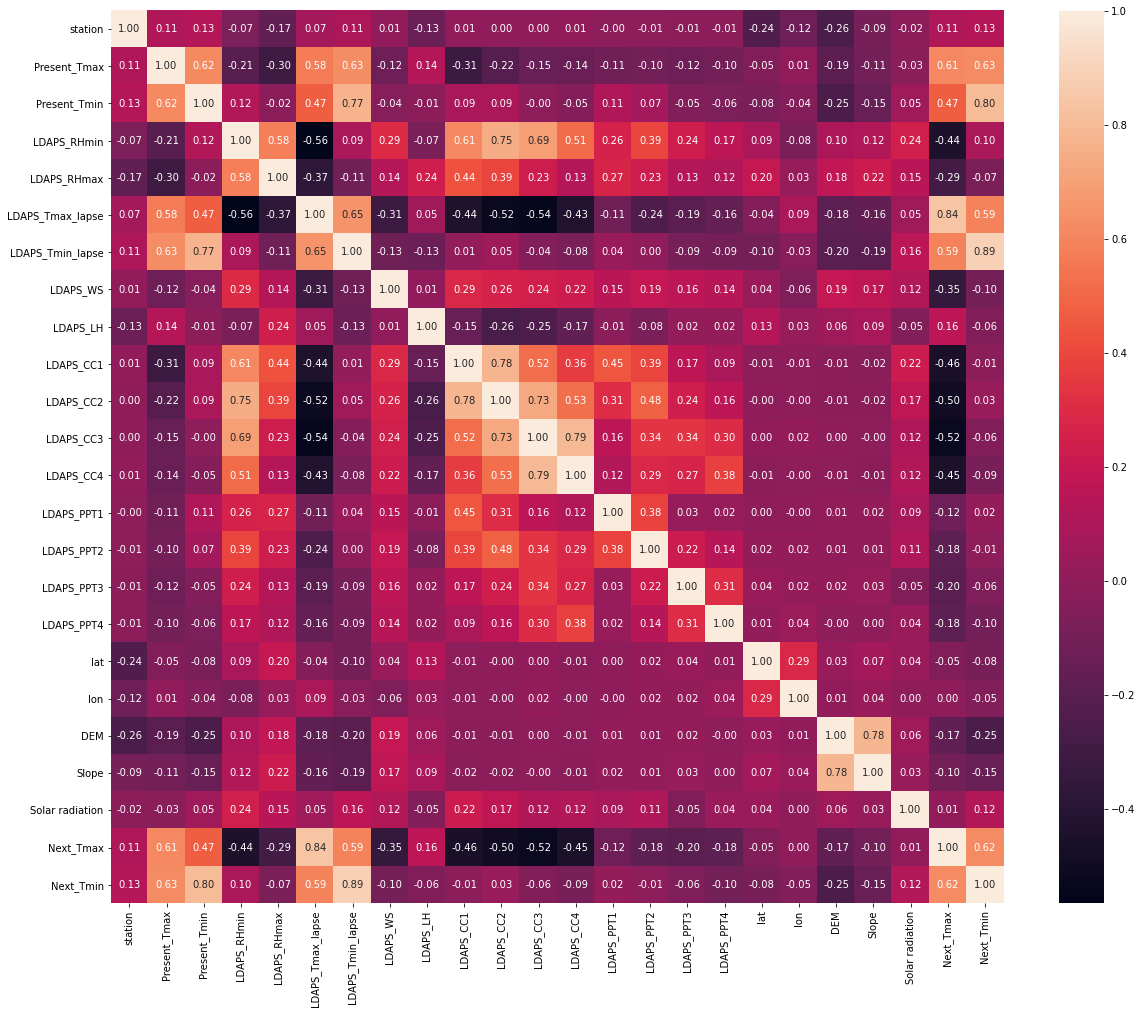

In [12]:
#plotting the heatmap of correlation between features
corr=df.corr()
plt.figure(figsize=(20,20))

sns.heatmap(corr,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

We see a high correlation between Present_Tmin and Next_Tmin, LDAPS_Tmin_Lapse and Next_Tmin, Next_Tmax and LDAPS_Tmax_Lapse, LDAPS_CC1 and LDAPS_CC2, LDAPS_CC3 and LDAPS_CC4, DEM and Slope

# Preprocessing

In [31]:
df.dropna(inplace=True)

Dropping all null values

In [32]:
df['day']=pd.to_datetime(df["Date"]).dt.day
df['month']=pd.to_datetime(df["Date"]).dt.month
df['year']=pd.to_datetime(df["Date"]).dt.year

Extracting Day, Month and Year from the Date column

In [33]:
df.drop(columns=['Date'],axis=1,inplace=True)

Dropping the original date column

# Finding Outliers

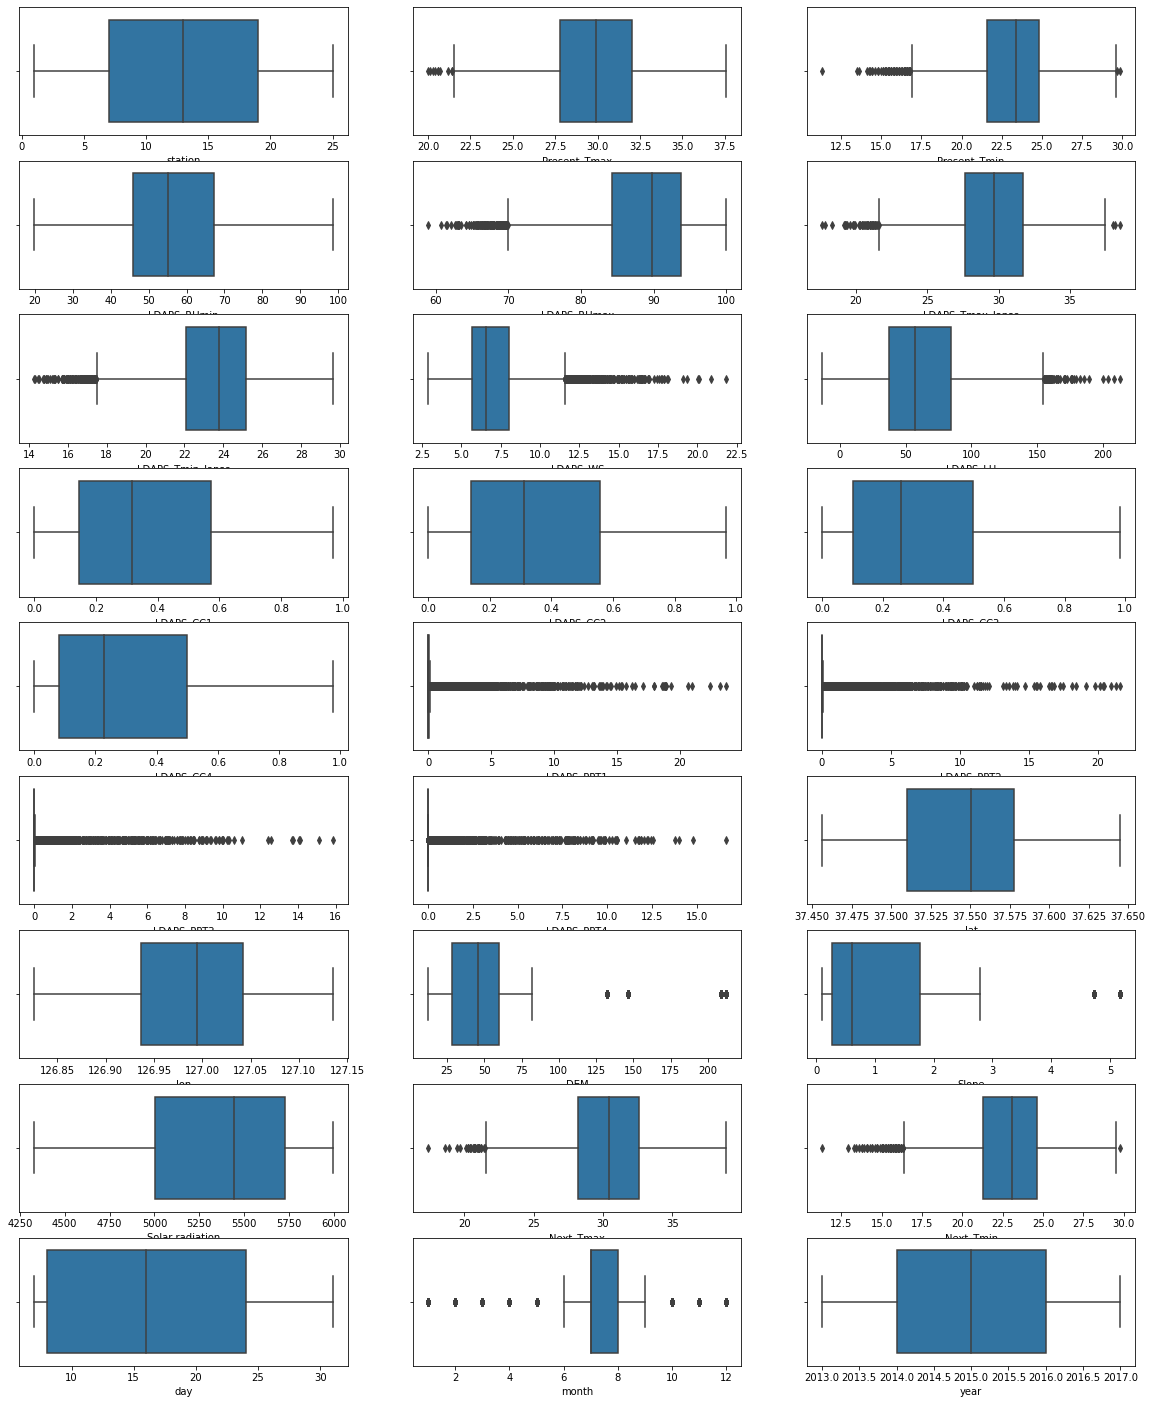

In [16]:
plt.figure(figsize=(20,25))
graph=1

for column in df:
    if(graph<=27):
        ax=plt.subplot(9,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

We see outliers in a lot of column and if we remove all those outliers then we are going to lose a huge amount of data. So I am keeping the outliers.

# Finding skewness

In [24]:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
day                 0.245482
month              -0.705241
year                0.000000
dtype: float64

We find skewness in LDAPS_RHmax, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope, Solar radiation

# Removing Skewness

In [34]:
df['LDAPS_RHmax']=np.sqrt(df['LDAPS_RHmax'])
df['LDAPS_Tmin_lapse']=np.sqrt(df['LDAPS_Tmin_lapse'])
df['LDAPS_WS']=np.sqrt(df['LDAPS_WS'])
df['LDAPS_LH']=np.sqrt(df['LDAPS_LH'])
df['LDAPS_CC3']=np.sqrt(df['LDAPS_CC3'])
df['LDAPS_CC4']=np.sqrt(df['LDAPS_CC4'])
df['LDAPS_PPT1']=np.sqrt(df['LDAPS_PPT1'])
df['LDAPS_PPT2']=np.sqrt(df['LDAPS_PPT2'])
df['LDAPS_PPT3']=np.sqrt(df['LDAPS_PPT3'])
df['LDAPS_PPT4']=np.sqrt(df['LDAPS_PPT4'])
df['DEM']=np.sqrt(df['DEM'])
df['Slope']=np.sqrt(df['Slope'])
df['Solar radiation']=np.sqrt(df['Solar radiation'])

We have removed the skewness by Square Root Transformation

# Splitting the data into features and label

In [35]:
X=df.drop(columns=['Next_Tmax'],axis=1)
y=df['Next_Tmax']

We have splitted the data into independent and target variables

In [37]:
#Standardizing

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

#Checking multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.235764,station
1,2.814100,Present_Tmax
2,3.519900,Present_Tmin
3,6.697260,LDAPS_RHmin
4,2.309943,LDAPS_RHmax
5,7.834895,LDAPS_Tmax_lapse
6,9.531584,LDAPS_Tmin_lapse
7,1.335549,LDAPS_WS
8,1.544991,LDAPS_LH
9,4.182869,LDAPS_CC1


As noticed in heatmap, LDAPS_Tmin_lapse and Next_Tmin are highly correlated. So dropping one of the columns from the dataset.

In [38]:
X.drop(columns=['LDAPS_Tmin_lapse'],axis=1,inplace=True)

In [39]:
#Checking multicollinearity by vif

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.235269,station
1,2.661848,Present_Tmax
2,3.413598,Present_Tmin
3,5.463543,LDAPS_RHmin
4,2.290615,LDAPS_RHmax
5,5.084920,LDAPS_Tmax_lapse
6,1.326670,LDAPS_WS
7,1.468793,LDAPS_LH
8,4.120878,LDAPS_CC1
9,5.698539,LDAPS_CC2


No collinearity issue

# Model Training

## Finding the best random state

In [40]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(X_train,Y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is:",maxAccu,"on Random State",maxRs)

Best accuracy is: 0.8334534191907119 on Random State 92


In [41]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=92)

Splitting the data into train and test set

### Checking accuracy by using different models

In [70]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(x_test)
print(r2_score(y_test,pred))

0.8281345692347707


The accuracy of Decision Tree Regressor is 83%

In [72]:
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(x_test)
print(r2_score(y_test,pred))

0.9227070492320211


The accuracy ofRandom Forest Regressor is 92%

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
gbc=GradientBoostingRegressor()
gbc.fit(X_train,Y_train)
pred=gbc.predict(x_test)
print(r2_score(y_test,pred))

0.8734314337238891


The accuracy of Gradient Boosting Regressor is 87%

In [78]:
SV=SVR()
SV.fit(X_train,Y_train)
pred=SV.predict(x_test)
print(r2_score(y_test,pred))

0.8889720758368929


The accuracy of Support Vector Regressor is 89%

## Regularization

In [42]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [43]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.8065515989413432

## Cross validation

In [79]:
from sklearn.model_selection import cross_val_score

In [81]:
print(cross_val_score(DTR,X_scaler,y,cv=5).mean())

0.5020245598958667


In [82]:
print(cross_val_score(RFR,X_scaler,y,cv=5).mean())

0.7107578487471332


In [86]:
print(cross_val_score(SV,X_scaler,y,cv=5).mean())

0.7044348928690443


In [87]:
print(cross_val_score(gbc,X_scaler,y,cv=5).mean())

0.7275760838720926


The difference between Accuracy and Cross validation is the least in RFR, so RFR is our best model

## Hyper parameter Tuning

In [73]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [75]:
Final_model=RandomForestRegressor(max_features='sqrt',criterion='mse')
Final_model.fit(X_train,Y_train)
pred=Final_model.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy:',acc*100)

Accuracy: 93.27760736547651


The accuracy has increased to 93%

# TMIN

In [5]:
df1=pd.read_csv(r'C:\Users\delkl\Desktop\DataTrained Data Science Projects\Projects\temperature.csv')
df1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


### EDA is as same as above so I will skip that part and go straight into preprocessing

# Preprocessing

In [44]:
df1.dropna(inplace=True)

In [46]:
df1['day']=pd.to_datetime(df1["Date"]).dt.day
df1['month']=pd.to_datetime(df1["Date"]).dt.month
df1['year']=pd.to_datetime(df1["Date"]).dt.year

In [48]:
df1.drop(columns=['Date'],axis=1,inplace=True)

### As discussed above, we are not removing the outliers.

## Removing Skewness

In [50]:
df1['LDAPS_RHmax']=np.sqrt(df1['LDAPS_RHmax'])
df1['LDAPS_Tmin_lapse']=np.sqrt(df1['LDAPS_Tmin_lapse'])
df1['LDAPS_CC3']=np.sqrt(df1['LDAPS_CC3'])
df1['LDAPS_WS']=np.sqrt(df1['LDAPS_WS'])
df1['LDAPS_LH']=np.sqrt(df1['LDAPS_LH'])
df1['LDAPS_CC4']=np.sqrt(df1['LDAPS_CC4'])
df1['LDAPS_PPT1']=np.sqrt(df1['LDAPS_PPT1'])
df1['LDAPS_PPT2']=np.sqrt(df1['LDAPS_PPT2'])
df1['LDAPS_PPT3']=np.sqrt(df1['LDAPS_PPT3'])
df1['LDAPS_PPT4']=np.sqrt(df1['LDAPS_PPT4'])
df1['DEM']=np.sqrt(df1['DEM'])
df1['Slope']=np.sqrt(df1['Slope'])
df1['Solar radiation']=np.sqrt(df1['Solar radiation'])

# Splitting the data into features and label

In [51]:
X1=df1.drop(columns=['Next_Tmin'],axis=1)
y1=df1['Next_Tmin']

In [52]:
#Standardizing

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X1)

#Checking multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X1.columns

vif

,score,Features
0,1.246100,station
1,2.901591,Present_Tmax
2,3.192472,Present_Tmin
3,6.675246,LDAPS_RHmin
4,2.307780,LDAPS_RHmax
5,9.446920,LDAPS_Tmax_lapse
6,7.562389,LDAPS_Tmin_lapse
7,1.377412,LDAPS_WS
8,1.571258,LDAPS_LH
9,4.208968,LDAPS_CC1


In [54]:
X1.drop(columns=['LDAPS_Tmax_lapse'],axis=1,inplace=True)

In [55]:
#Standardizing

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X1)

#Checking multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X1.columns

vif

,score,Features
0,1.239646,station
1,2.841770,Present_Tmax
2,3.191664,Present_Tmin
3,4.394360,LDAPS_RHmin
4,2.301355,LDAPS_RHmax
5,4.479759,LDAPS_Tmin_lapse
6,1.377319,LDAPS_WS
7,1.570656,LDAPS_LH
8,4.191824,LDAPS_CC1
9,5.677293,LDAPS_CC2


No collinearity issue

# Model Training

## Finding the best random state

In [56]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X1_train,x1_test,Y1_train,y1_test=train_test_split(X_scaler,y1,test_size=0.25,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(X1_train,Y1_train)
    pred=mod.predict(x1_test)
    acc=r2_score(y1_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is:",maxAccu,"on Random State",maxRs)

Best accuracy is: 0.8282233829738346 on Random State 109


In [57]:
X1_train,x1_test,Y1_train,y1_test=train_test_split(X_scaler,y1,test_size=0.25,random_state=109)

In [58]:
DTR=DecisionTreeRegressor()
DTR.fit(X1_train,Y1_train)
pred=DTR.predict(x1_test)
print(r2_score(y1_test,pred))

0.8280450618109139


The accuracy of Decision Tree Regressor is 83%

In [59]:
RFR=RandomForestRegressor()
RFR.fit(X1_train,Y1_train)
pred=RFR.predict(x1_test)
print(r2_score(y1_test,pred))

0.9144640813306689


The accuracy of Random Forest Regressor is 91%

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
gbc=GradientBoostingRegressor()
gbc.fit(X1_train,Y1_train)
pred=gbc.predict(x1_test)
print(r2_score(y1_test,pred))

0.9029796400151023


The accuracy of Gradient Boosting Regressor is 90%

In [61]:
SV=SVR()
SV.fit(X1_train,Y1_train)
pred=SV.predict(x1_test)
print(r2_score(y1_test,pred))

0.9276735391941942


The accuracy of Support Vector Regressor is 93%

## Regularization

In [63]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X1_train,Y1_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [64]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(X1_train,Y1_train)
ls.score(X1_train,Y1_train)
pred_ls1=ls.predict(x1_test)

lss=r2_score(y1_test,pred_ls1)
lss

0.8582413039941337

## Cross validation

In [65]:
from sklearn.model_selection import cross_val_score

In [67]:
print(cross_val_score(DTR,X_scaler,y1,cv=5).mean())

0.5740976536877485


In [68]:
print(cross_val_score(RFR,X_scaler,y1,cv=5).mean())

0.7939319041426676


In [70]:
print(cross_val_score(gbc,X_scaler,y1,cv=5).mean())

0.8024134514156355


In [72]:
print(cross_val_score(SV,X_scaler,y1,cv=5).mean())

0.7375292610395989


The difference between Accuracy and Cross validation is the least in GBR, so GBR is our best model

## Hyper parameter Tuning

In [77]:
parameters1={'loss':['ls','lad','huber'],'criterion':['mae','mse']}
rf1=GradientBoostingRegressor()
clf1=GridSearchCV(rf1,parameters1)
clf1.fit(X1_train,Y1_train)

print(clf1.best_params_)

{'criterion': 'mse', 'loss': 'ls'}


In [78]:
Final_model1=GradientBoostingRegressor(loss='ls',criterion='mse')
Final_model1.fit(X1_train,Y1_train)
pred1=Final_model.predict(x1_test)
acc1=r2_score(y1_test,pred1)
print('Accuracy:',acc1*100)

Accuracy: -752.4042179059054


## Saving the model

In [79]:
import joblib
joblib.dump(Final_model,"FinalModelTemperature.pkl")

['FinalModelTemperature.pkl']